# Interpollation

## Question 1

Given the data points

| x | y |
| --- | --- |
| −1.2 | −5.76 |
| 0.3 | −5.61 |
| 1.1 | −3.69 |


- (a) determine $y$ at $x = 0$ using Lagrange’s method (do it by hand)
- (b) determine $y$ at $x = 0$ using Newton’s method (do it by hand)
- (c) determine $y$ at $x = 0$ using Neville’s method (do it by hand)


- (d) implement the newton algorithm and use it to draw the interpollation curve
- (e) implement the neville algorithm and use it to draw the interpollation curve

Solutions:

(a) $P_n(x) = \sum_{i=1}^n(y_i \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}) = -5.76*\frac{(x-0.3)}{-1.5}*\frac{(x-1.1)}{-2.3}
 -5.61*\frac{(x+1.2)}{1.5}\frac{(x-1.1)}{-0.8} -3.69*\frac{(x+1.2)}{2.3}\frac{(x-0.3)}{0.8}$
 
   $P_n(0) \approx -6$
   
(b) System to solve:
 
$y_0 = a_0$

$y_1 = a_0 + (x_1-x_0)*a_1$

$y_2 = a_0 + (x_2-x_0)*a_1 + (x_2-x_0)(x_2-x_1)*a_2$

$\Rightarrow a_0=-5.76,a_1=0.1,a_2=1$

$P_n(x) = a_0 + (x-x_0)*a_1 + (x-x_0)(x-x_1)*a_2 \Rightarrow P_n(0) = -6$

(c) $P_0[x_i] = y_i$

$P_k[x_i,...,x_{i+k}] = \frac{(x-x_{i+k})P_{k-1}[x_i,...,x_{i+k-1}] + (x_i-x)P_{k-1}[x_{i+1},...,x_{i+k}]}{x_i-x_{i+k}}$

$\Rightarrow P_1[x_0,x_1] = -5.64,~~P_1[x_1,x_2]=-6.33,~~P_2[x_0,x_1,x_2]=-6$


Newton at 0 -6.0
Neville at 0 -6.000000000000002
[-5.61 -5.76 -5.89 -6.   -6.09 -6.16 -6.21 -6.24 -6.25 -6.24 -6.21 -6.16
 -6.09 -6.   -5.89 -5.76 -5.61 -5.44 -5.25 -5.04 -4.81 -4.56 -4.29 -4.
 -3.69]


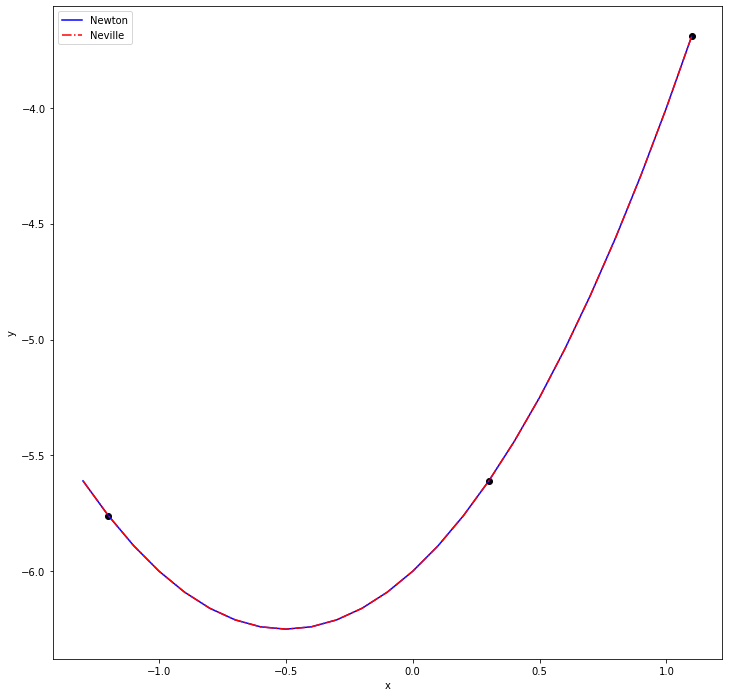

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Newton_coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a


def Newton_evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def Neville(xData,yData,x):
    m = len(xData)   # number of data points
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xData[k:m])*y[0:m-k] +      \
                    (xData[0:m-k] - x)*y[1:m-k+1])/  \
                    (xData[0:m-k] - xData[k:m])
    return y[0]


xData = np.array([-1.2, 0.3, 1.1])
yData = np.array([-5.76, -5.61, -3.69])

coeffts = Newton_coeffts(xData, yData)

print("Newton at 0", Newton_evalPoly(coeffts, xData, 0.0))
print("Neville at 0", Neville(xData, yData, 0.0))


x = np.arange(np.min(xData)-0.1, np.max(xData)+0.1, 0.1)
y_newton  = np.array( [Newton_evalPoly(coeffts, xData, xi) for xi in x] )
y_neville = np.array( [Neville(xData, yData, xi) for xi in x] )

# Plot the points using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(xData, yData, 'o', color="black")
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_newton , '-', color="blue", label="Newton")   
plt.plot(x, y_neville, '-.', color="red", label="Neville")   
ax.legend()

print(y_newton)

## Question 2

Find the zero of $y=f(x)$ from the following data

| x | y |
| --- | --- |
| 0.0 | 1.8421 |
| 0.5 | 2.4694|
| 1.0 | 2.4921 |
| 1.5 | 1.9047 |
| 2.0 | 0.8509 |
| 2.5 | -0.4112 |
| 3.0 | -1.5727 |


- (a) Use Lagrange with the 3 nearest points (do it by hand)
- (b) Use Lagrange with the 4 nearest points (do it by hand)
- (c) do with with the Neville algorithm using the 5 nearest points
- (d) draw the best approximation of the function $x = f^{-1}(y)$ for $y \in [-1.5727, 2.4921]$

Solutions:

(a) The three nearest points to $f(x)=0$ are (2.0,0.8509),(2.5,-0.4114) and (3.0,-1.5727)

$P_2(x) = 0.2012x^2 -3.4296x + 6.9053 \Rightarrow x_{1,2} = \{2.3327,14.713\} \Rightarrow x=2.3327$ as it must be between 2.0 and 2.5.

(b) We add the point (1.5,1.9047)

$\Rightarrow P_3(x) = 0.411867x^3-2.8878x^2+4.18993x+0.7273 \Rightarrow x_{1,2,3}=\{-0.156397,2.33865,4.82912\} \Rightarrow x=2.33865$

(c) Finding $f(x)=0$ is equivalent to solving $f^{-1}(0)=x$.

$P_4[y_2,y_3,y_4,y_5,y_6](0) = 2.325907 $

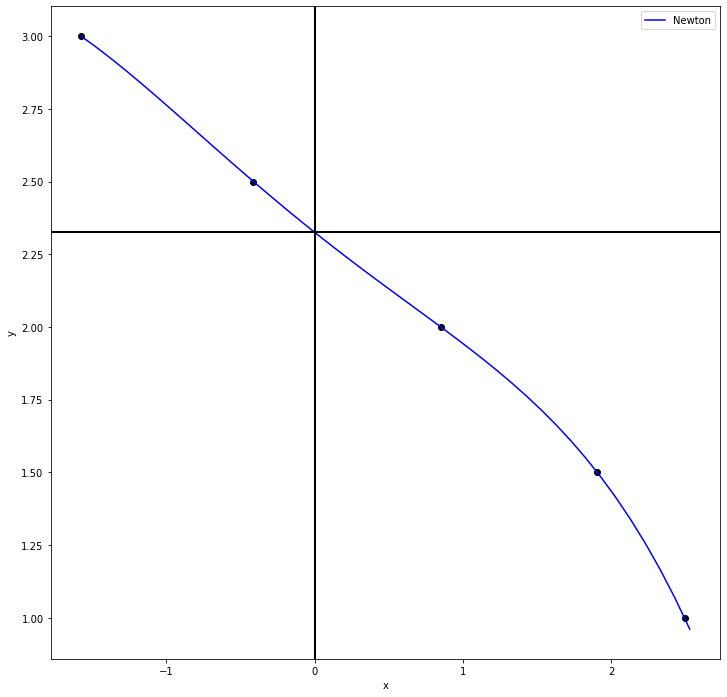

In [3]:
xData = np.array([-1.5727, -0.4112, 0.8509, 1.9047, 2.4921])
yData = np.array([3.0, 2.5, 2.0, 1.5, 1.0])

coeffts = Newton_coeffts(xData, yData)

x = np.arange(np.min(xData), np.max(xData)+0.1, 0.1)
y_newton  = np.array( [Newton_evalPoly(coeffts, xData, xi) for xi in x] )

# Plot the points using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(xData, yData, 'o', color="black")
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y_newton , '-', color="blue", label="Newton")   
ax.legend()
ax.axvline(0, color='black', lw=2)
ax.axhline(2.3259, color='black', lw=2)

## Question 3

The following points lies on a polynomial:

| x | y |
| --- | --- |
| -2 | -1 |
| 1 | 2|
| 4 | 59 |
| -1 | 4 |
| 3 | 24 |
| -4 | -53 |

- (a) Use the divided difference table of the Newton method to determine the degree of the polynomial
- (b) Obtain the same results from the algorithm
- (c) Draw the points and the Newton polynomial to highlight this

Solutions:

(a) 

| x | y | $\nabla y$ | $\nabla^2 y$ | $\nabla^3 y$ | $\nabla^4 y$ | $\nabla^5 y$ |
| --- | --- | --- | --- | --- | --- | --- | 
| -2 | -1 |   |   |   |   |   |
| 1  | 2  | 1 |   |   |   |   |
| 4  | 59 | 10| 3 |   |   |   |
| -1 | 4  | 5 |-2 | 1 |   |   |
| 3  | 24 | 5 | 2 | 1 | 0 |   |
| -4 | -53|26 | -5| 1 | 0 | 0 |

$\Rightarrow$ third degree polynomial


In [5]:
xData = np.array([-2, 1, 4, -1, 3, -4.0])
yData = np.array([-1, 2.0, 59, 4, 24, -53.0])
coeffts = Newton_coeffts(xData, yData)
print(coeffts)




[-1.  1.  3.  1.  0.  0.]


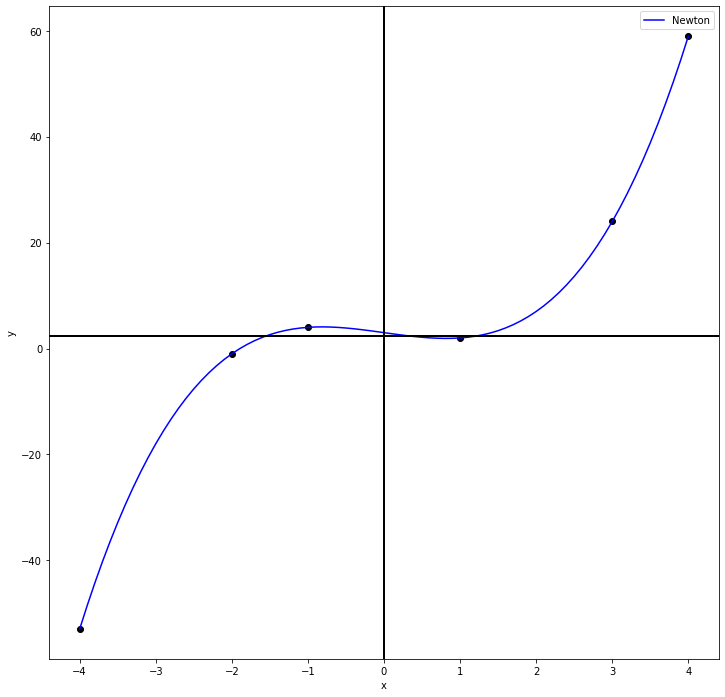

In [6]:
# Plot the points using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(xData, yData, 'o', color="black")
plt.xlabel('x')
plt.ylabel('y')


x = np.arange(np.min(xData), np.max(xData)+0.1, 0.1)
y_newton  = np.array( [Newton_evalPoly(coeffts, xData, xi) for xi in x] )

plt.plot(x, y_newton , '-', color="blue", label="Newton")   
ax.legend()
ax.axvline(0, color='black', lw=2)
ax.axhline(2.3259, color='black', lw=2)